# Exploratory Data Analysis (EDA) for LegalClause Contract Clause Dataset
This notebook examines a combined dataset from LegalBench (`cuad_cap_on_liability`, `cuad_audit_rights`, `cuad_insurance`) with four classes—Cap on Liability, Audit Rights, Insurance, and None—to analyze its structure, class distribution, clause lengths, and frequent terms, providing insights into the data used for clause classification and risk analysis in the LexCounsel project.

In [3]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [21]:
# Load and combine LegalBench datasets for cap_on_liability, audit_rights, insurance, and 'none' class

# Load datasets
dataset_cap = load_dataset("nguha/legalbench", "cuad_cap_on_liability", trust_remote_code=True)
dataset_audit = load_dataset("nguha/legalbench", "cuad_audit_rights", trust_remote_code=True)
dataset_insurance = load_dataset("nguha/legalbench", "cuad_insurance", trust_remote_code=True)

# Convert to DataFrames
df_cap = pd.DataFrame(dataset_cap['test'])
df_audit = pd.DataFrame(dataset_audit['test'])
df_insurance = pd.DataFrame(dataset_insurance['test'])

# Filter 'yes' examples and assign class labels
df_cap_yes = df_cap[df_cap['answer'].str.lower() == 'yes'].copy()
df_cap_yes['class_label'] = 0  # Cap on Liability
df_audit_yes = df_audit[df_audit['answer'].str.lower() == 'yes'].copy()
df_audit_yes['class_label'] = 1  # Audit Rights
df_insurance_yes = df_insurance[df_insurance['answer'].str.lower() == 'yes'].copy()
df_insurance_yes['class_label'] = 2  # Insurance

# Filter 'no' examples and sample 20% to balance 'none' class
df_cap_no = df_cap[df_cap['answer'].str.lower() == 'no'].sample(n=int(0.2 * len(df_cap_yes)), random_state=42).copy()
df_cap_no['class_label'] = 3  # None
df_audit_no = df_audit[df_audit['answer'].str.lower() == 'no'].sample(n=int(0.2 * len(df_audit_yes)), random_state=42).copy()
df_audit_no['class_label'] = 3  # None
df_insurance_no = df_insurance[df_insurance['answer'].str.lower() == 'no'].sample(n=int(0.2 * len(df_insurance_yes)), random_state=42).copy()
df_insurance_no['class_label'] = 3  # None

# Combine all
df_combined = pd.concat([df_cap_yes, df_audit_yes, df_insurance_yes, df_cap_no, df_audit_no, df_insurance_no], ignore_index=True)

# Deduplicate and preprocess
print(f"Total clauses before deduplication: {len(df_combined)}")
df_combined = df_combined.drop_duplicates(subset=['text'], keep='first')
print(f"Total clauses after deduplication: {len(df_combined)}")
df_combined['cleaned_text'] = df_combined['text'].apply(lambda x: x.strip().lower())

Total clauses before deduplication: 2094
Total clauses after deduplication: 2052


In [7]:
df_combined[['text', 'class_label']].tail()

,text,class_label
2088,This Agreement shall commence as of the Effect...,3
2089,eDiets shall have fifteen (15) days from the g...,3
2091,In the event the Production Session exceeds ei...,3
2092,"Pey Dirt also grants to Company, subject to al...",3
2093,Exact shall use commercially reasonable effort...,3


Label Distribution

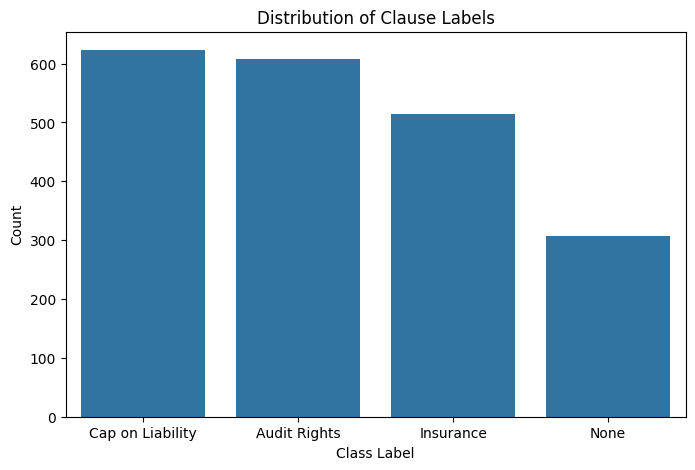

In [19]:
label_counts = df_combined['class_label'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Clause Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cap on Liability", "Audit Rights", "Insurance", "None"])
plt.show()

In [20]:
print(f'Label distribution:\n{label_counts}')

Label distribution:
class_label
0    623
1    608
2    514
3    307
Name: count, dtype: int64


Clause Length Analysis

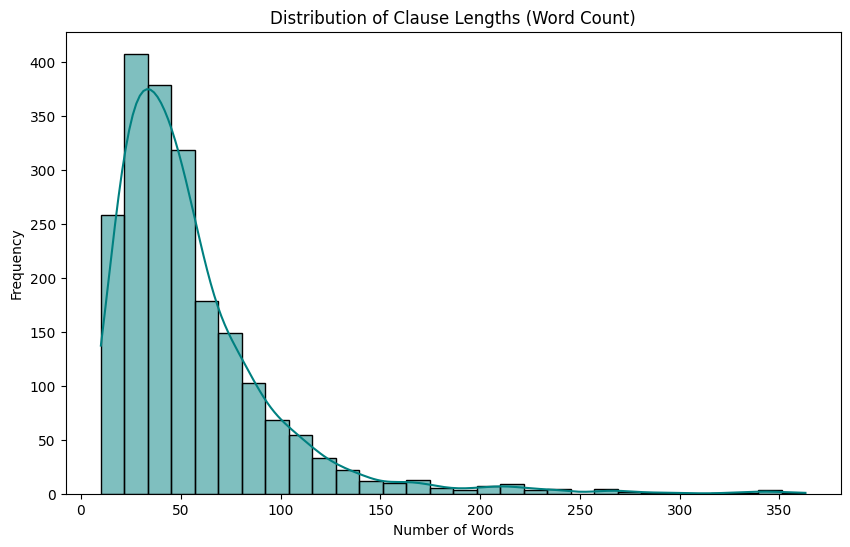

In [10]:
# Analyze and visualize clause lengths in words

df_combined['clause_length'] = df_combined['cleaned_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['clause_length'], bins=30, kde=True, color='teal')
plt.title('Distribution of Clause Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [11]:
print(f'Average clause length: {df_combined["clause_length"].mean():.2f} words')
print(f'Median clause length: {df_combined["clause_length"].median():.2f} words')
print(f'Max clause length: {df_combined["clause_length"].max()} words')

Average clause length: 55.44 words
Median clause length: 45.00 words
Max clause length: 363 words


Word Cloud for Cap on Liability

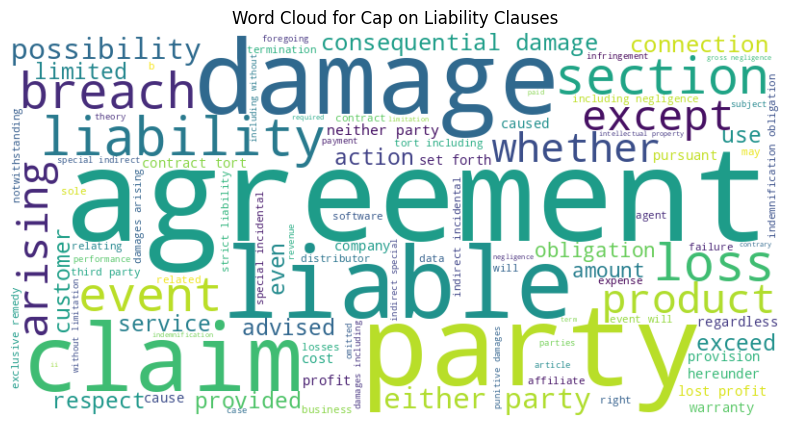

In [14]:
# Cell 5: Word Cloud for Cap on Liability
# Generate word cloud for Cap on Liability clauses (class 0)

class_text = ' '.join(df_combined[df_combined['class_label'] == 0]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(class_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cap on Liability Clauses')
plt.show()

Word Cloud for Audit Rights

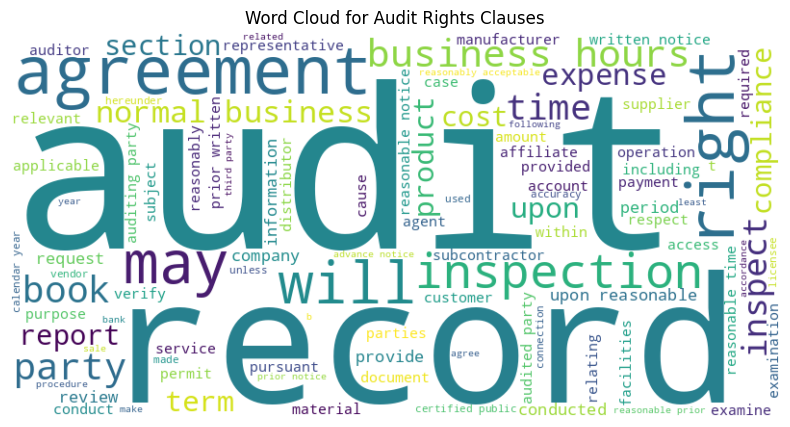

In [15]:
# Generate word cloud for Audit Rights clauses (class 1)

class_text = ' '.join(df_combined[df_combined['class_label'] == 1]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(class_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Audit Rights Clauses')
plt.show()

Word Cloud for Insurance

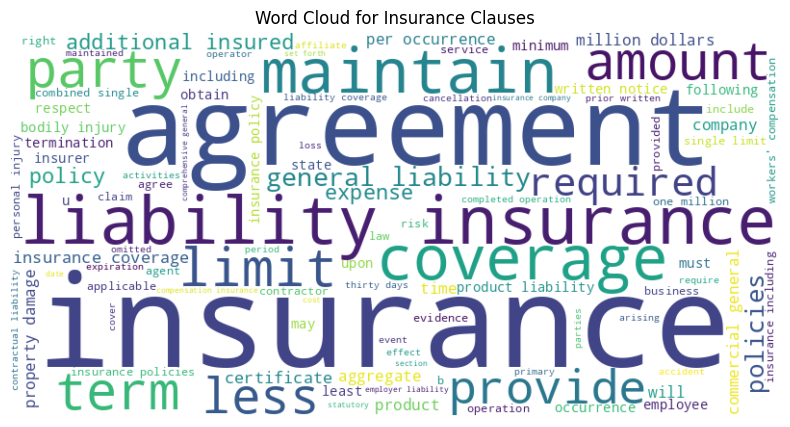

In [16]:
# Generate word cloud for Insurance clauses (class 2)

class_text = ' '.join(df_combined[df_combined['class_label'] == 2]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(class_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Insurance Clauses')
plt.show()

Word Cloud for None

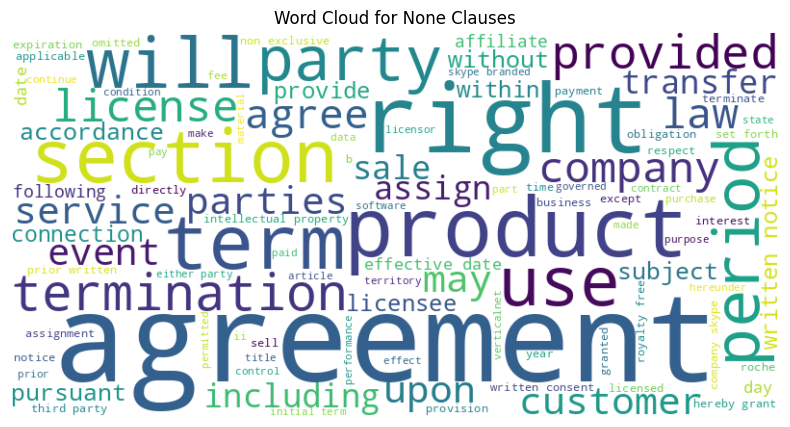

In [18]:
class_text = ' '.join(df_combined[df_combined['class_label'] == 3]['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(class_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for None Clauses')
plt.show()